In [1]:
import os
os.chdir("/Users/sanat/Downloads/")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("Credit.csv")
#Dropping Unnamed:0
df = df.drop(["Unnamed: 0"],1)
X = df.drop(["Balance"],1)
y = df["Balance"]

In [3]:
scaler  = MinMaxScaler()

In [4]:
X = pd.get_dummies(X)
cols = list(X)
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = cols
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
drop = ['Gender_ Male','Student_No','Married_No', 'Ethnicity_African American']

In [9]:
X.dtypes

Income                        float64
Limit                         float64
Rating                        float64
Cards                         float64
Age                           float64
Education                     float64
Gender_Female                 float64
Gender_Male                   float64
Student_No                    float64
Student_Yes                   float64
Married_No                    float64
Married_Yes                   float64
Ethnicity_African American    float64
Ethnicity_Asian               float64
Ethnicity_Caucasian           float64
dtype: object

In [10]:
categorical = list(X)[-5:]

In [11]:
categorical

['Married_No',
 'Married_Yes',
 'Ethnicity_African American',
 'Ethnicity_Asian',
 'Ethnicity_Caucasian']

In [12]:
for x in categorical:
    X[x] = X[x].astype("category")

In [13]:
X.dtypes

Income                         float64
Limit                          float64
Rating                         float64
Cards                          float64
Age                            float64
Education                      float64
Gender_Female                  float64
Gender_Male                    float64
Student_No                     float64
Student_Yes                    float64
Married_No                    category
Married_Yes                   category
Ethnicity_African American    category
Ethnicity_Asian               category
Ethnicity_Caucasian           category
dtype: object

In [14]:
y = pd.DataFrame(y)

In [15]:
y.columns = ["Balance"]

In [16]:
df = pd.concat([X,y],1)

In [17]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Balance
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,333
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,903
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,580
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,964
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,331


In [18]:
numeric = df.select_dtypes(include = np.number)
non_numeric = df.select_dtypes(exclude = np.number)

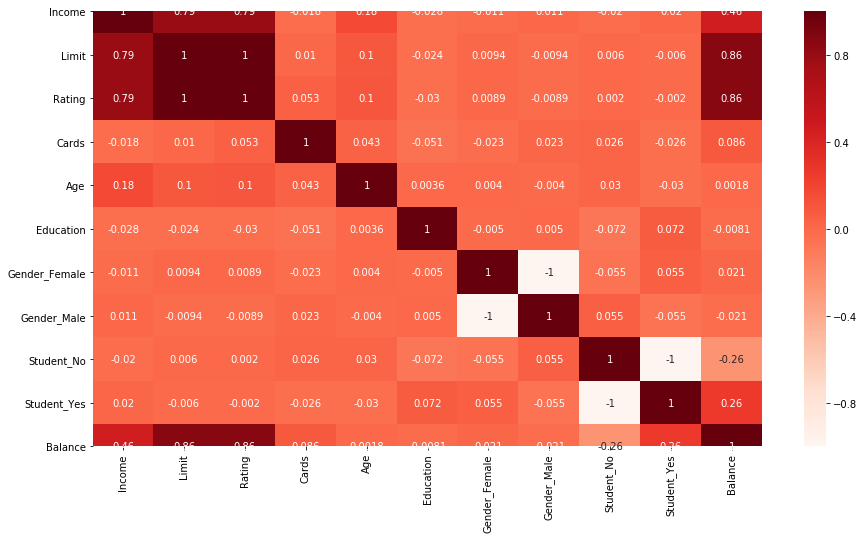

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric.corr(), annot=True, cmap=plt.cm.Reds)

In [20]:
df.dtypes

Income                         float64
Limit                          float64
Rating                         float64
Cards                          float64
Age                            float64
Education                      float64
Gender_Female                  float64
Gender_Male                    float64
Student_No                     float64
Student_Yes                    float64
Married_No                    category
Married_Yes                   category
Ethnicity_African American    category
Ethnicity_Asian               category
Ethnicity_Caucasian           category
Balance                          int64
dtype: object

In [21]:
cols = list(df)[-6:-1]

In [22]:
for x in cols:
    df[x] = df[x].astype("int")

In [23]:
df.dtypes

Income                        float64
Limit                         float64
Rating                        float64
Cards                         float64
Age                           float64
Education                     float64
Gender_Female                 float64
Gender_Male                   float64
Student_No                    float64
Student_Yes                   float64
Married_No                      int32
Married_Yes                     int32
Ethnicity_African American      int32
Ethnicity_Asian                 int32
Ethnicity_Caucasian             int32
Balance                         int64
dtype: object

In [24]:
# sm.OLS(formula='Balance~ Literacy + Wealth + Region', data=df)

In [25]:
sm.OLS(formula = "Balance~Limit+Gender_Female+Student_Yes+Ethnicity_Asian+Ethnicity_Caucasian", data = df)

TypeError: __init__() missing 1 required positional argument: 'endog'

In [26]:
import statsmodels.formula.api as smf

In [27]:
results = smf.ols('Balance~Limit+Gender_Female+Student_Yes+Married_Yes+Ethnicity_Asian+Ethnicity_Caucasian', data=df).fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     284.5
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          1.24e-139
Time:                        16:57:16   Log-Likelihood:                -2684.2
No. Observations:                 400   AIC:                             5382.
Df Residuals:                     393   BIC:                             5410.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -195.3800     30.477     -6.411      0.000    -255.298    -135.462
Limit                2248.3328     56.848     39.550      0.000    2136.568    2360.097
Gender_Female          -1.1163     20.092     -0.056      0.956     -40.617      38.384
Student_Yes           403.0036     33.616     11.988      0.000     336.914     469.094
Married_Yes           -13.4505     20.795     -0.647      0.518     -54.334      27.433
Ethnicity_Asian        20.0002     28.530      0.701      0.484     -36.090      76.090
Ethnicity_Caucasian    21.4012     24.736      0.865      0.387     -27.231      70.033
==============================================================================
Omnibus:                        7.408   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.298
Skew:                          -0.324   Prob(JB):                       0.0260
Kurtosis:                       3.130   Cond. No.                         8.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = df.drop(["Balance"],1)
y = df["Balance"]

In [30]:
features = ['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender_Female',
 'Student_Yes',
 'Married_Yes',
 'Ethnicity_Asian',
 'Ethnicity_Caucasian']

In [31]:
features = ['Income',
 'Limit',
 'Rating',
 'Student_Yes']
X = df[features]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()
# from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()

C:\Users\sanat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1967.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          3.06e-259
Time:                        16:57:17   Log-Likelihood:                -2411.3
No. Observations:                 400   AIC:                             4833.
Df Residuals:                     395   BIC:                             4852.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -291.2277     10.513    -27.700      0.000    -311.897    -270.558
Income      -1400.4801     41.505    -33.742      0.000   -1482.079   -1318.881
Limit        1588.9299    363.824      4.367      0.000     873.657    2304.203
Rating       1947.3000    368.879      5.279      0.000    1222.088    2672.512
Student_Yes   422.6684     16.874     25.049      0.000     389.495     455.842
==============================================================================
Omnibus:                       24.527   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.945
Skew:                           0.647   Prob(JB):                     8.55e-07
Kurtosis:                       2.963   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.9521875044403831

In [35]:
cross_val_score(lin_reg,X,y,cv = 10).mean()

0.9486481287322908

In [36]:
from sklearn.feature_selection import RFE

In [37]:
rfe = RFE(lin_reg, 4)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [False  True  True  True  True]
Feature Ranking: [2 1 1 1 1]


In [38]:
X.columns

Index(['const', 'Income', 'Limit', 'Rating', 'Student_Yes'], dtype='object')

In [39]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [40]:
# X = df.drop(["Balance"],1)
features = ['Income',
 'Limit',
 'Rating',
 'Student_Yes']
X = df[features]
y = df["Balance"]

In [41]:
reg = RidgeCV()
reg.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print(reg.score(X,y))

Best alpha using built-in RidgeCV: 0.100000
0.9519690927376542


In [42]:
reg = LassoCV()
X = df.drop(["Balance"],1)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print(reg.score(X,y))
reg.alpha_

C:\Users\sanat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.069854
0.9550922471836552


0.06985448564098638

In [43]:
coef = pd.Series(reg.coef_, index = X.columns)

In [44]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 1 variables


In [45]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

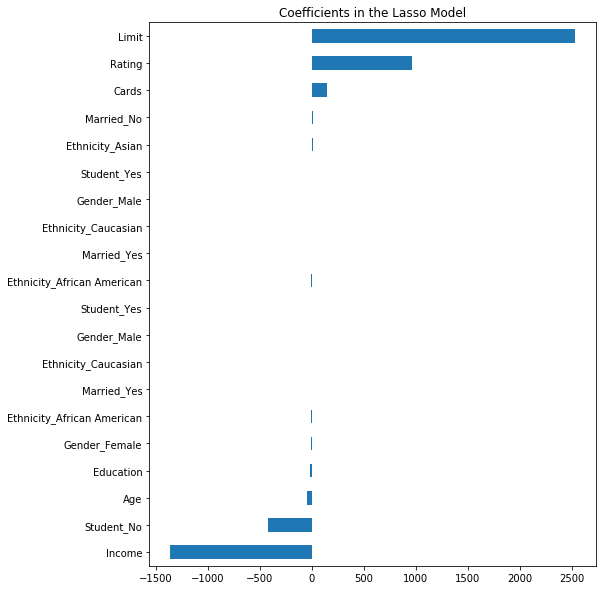

In [46]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")